# Classify in Python
在此我們要示範如何使用Python進行分類法的實作


## Data Preparing

跟Weka不同的是，鳶尾花資料集已經存在於Weka的預設資料集當中

而使用Python自行操作的時候，則需要自己下載鳶尾花資料集


In [2]:
import pandas as pd

# fetch dataset
# iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
row_data=pd.read_csv('winequality-red.csv')
row_data=pd.DataFrame(row_data)
X = row_data.iloc[:, :11+1]
y= row_data[['quality category']]

In [3]:
# X.to_numpy()
y


,quality category
0,average
1,average
2,average
3,average
4,average
...,...
1594,average
1595,average
1596,average
1597,average


## Data Preprocessing

在此需要先清理資料並將資料切割成training data和testint data

### Data Cleaning

In [4]:
import pandas as pd
from sklearn import datasets, model_selection, tree, metrics, preprocessing

In [5]:
# 因模型不接受字串輸入，所以需要將class名稱改成數字
# 使用LabelEncode()

le = preprocessing.LabelEncoder()
class_ls = le.fit_transform(y['quality category'])

new_y = pd.DataFrame(class_ls, columns = ['quality category'])
new_y

,quality category
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


In [6]:
new_y.to_numpy().ravel()

array([0, 0, 0, ..., 0, 0, 0])

### Data Splitting
將資料分成 training set 和 testing set

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, new_y, test_size=0.33)

In [8]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
879,7.2,0.600,0.04,2.5,0.076,18.0,88.0,0.99745,3.53,0.55,9.5,5
1215,8.8,0.270,0.46,2.1,0.095,20.0,29.0,0.99488,3.26,0.56,11.3,6
376,11.5,0.450,0.50,3.0,0.078,19.0,47.0,1.00030,3.26,1.11,11.0,6
241,12.0,0.380,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9,6
191,6.4,0.370,0.25,1.9,0.074,21.0,49.0,0.99740,3.57,0.62,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
743,11.6,0.410,0.58,2.8,0.096,25.0,101.0,1.00024,3.13,0.53,10.0,5
181,8.9,0.610,0.49,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,5
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
625,6.8,0.690,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,5


In [9]:
print('X_train= ', len(X_train))
print('X_test= ', len(X_test))
print('y_train= ', len(y_train))
print('y_test= ', len(y_test))

X_train=  1071
X_test=  528
y_train=  1071
y_test=  528


## Model Training

資料準備完成後，開始訓練決策樹模型 ID3

In [10]:
dtree = tree.DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
y_pred = dtree.predict(X_test)
print(y_pred)
print(y_test['quality category'].to_numpy())

[0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1
 1 0 0 0 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 2
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 2 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 2 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 

## Evaluation
評估模型分類的準確度

In [12]:
# 準確度評估標
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        19

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



In [13]:
# import 繪圖model
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# 混淆矩陣
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[439,   0,   0],
       [  0,  70,   0],
       [  0,   0,  19]], dtype=int64)

In [15]:
# 可看到分類的全部類別
dtree.classes_

array([0, 1, 2])

In [16]:
# 將數字轉換為原始類別名稱
class_name_ls = le.inverse_transform(dtree.classes_)
print(class_name_ls)

['average' 'excellent' 'low']


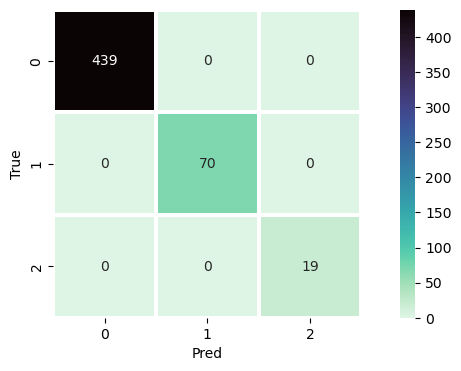

In [17]:
plt.figure(figsize=(10, 4))
#可替換的色調選項：cmap='copper', 'copper_r', 'mako_r', 'Reds', 'rocket_r'
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='mako_r', linecolor='white', linewidths=1.5, cbar=True)
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

## Visualization
決策樹視覺化

In [18]:
!pip install pydotplus

In [19]:
from IPython.core.display import Image
import pydotplus
from sklearn.tree import plot_tree

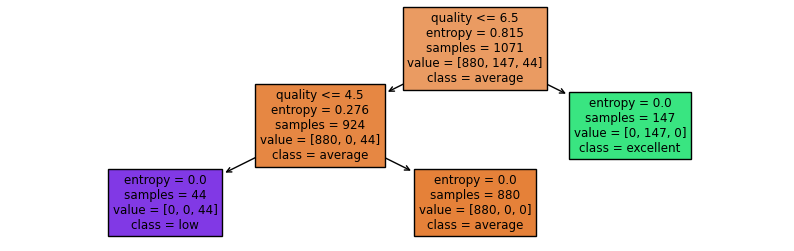

<Figure size 640x480 with 0 Axes>

In [20]:
# dot_data = tree.export_graphviz(dtree,
#                  feature_names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],
#                  class_names=class_name_ls)

# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

plt.figure(figsize=(10, 3))
plot_tree(dtree, 
          feature_names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'], 
          class_names=class_name_ls, 
          filled=True)
plt.show()

plt.savefig('ID3.png')

## Cross validation
這是一種用於評估機器學習模型性能的技術，透過多次劃分資料集，以更全面的評估模型的泛用性與穩定性

In [21]:
dtree_cv = tree.DecisionTreeClassifier(criterion="entropy")

In [22]:
scores = model_selection.cross_val_score(dtree_cv, X, new_y, cv=10, scoring='accuracy')
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
mean_scores = []
var_scores = []
for n in range(10):
  # cross_validate(dtree, X, y, cv=分成多少等份) 隨機抽取資料進行cv次驗證
  scores = model_selection.cross_val_score(dtree_cv, X, new_y, cv=10, scoring='accuracy')
  mean_scores.append(scores.mean())#取這10次的平均值

  var_scores.append(scores.var())#取這10次的方差

In [24]:
mean_scores
scores.mean()

1.0

In [25]:
var_scores
scores.var()

0.0

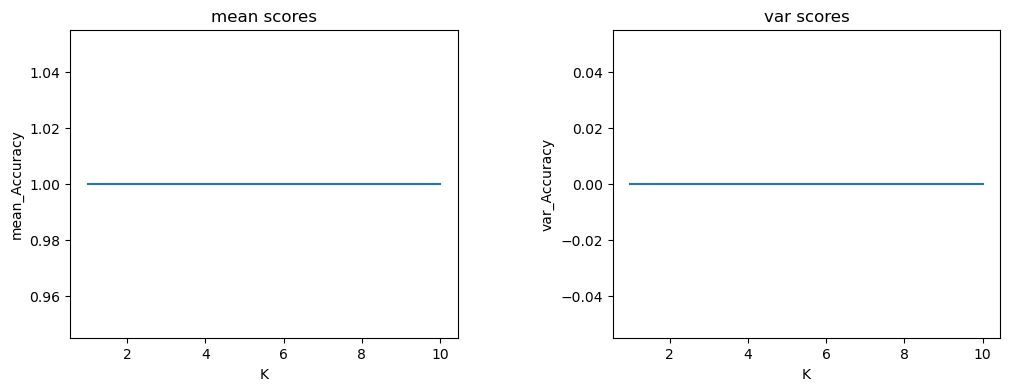

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# 平均值
# 平均值越接近1，表示模型在平均情況下表現得越好
# 也就是說，在取到平衡數據的情況下，模型的表現良好
axes[0].plot(range(1,11), mean_scores)
axes[0].set_xlabel('K')
axes[0].set_ylabel('mean_Accuracy')
axes[0].set_title('mean scores')

# 變異數=>(X-mean)^2的總和取平均
# 變異數(方差)越小，代表模型性能越穩定
# 也就是說，即使取到不平衡的訓練集，對整體模型的影響也較小，模型相對穩定
axes[1].plot(range(1,11), var_scores)
axes[1].set_xlabel('K')
axes[1].set_ylabel('var_Accuracy')
axes[1].set_title('var scores')

plt.show()